# Projeto Análise de Inadimplência

## 1\. Exploração de dados

In [1]:
URL = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> Indicando ao Pandas dados nulos ou vazios

In [3]:
df = pd.read_csv(URL, na_values=['na', '', None])

In [4]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [5]:
df.shape # quantidade de linhas e colunas

(10127, 16)

### 1\.1 Variável Resposa: clientes Inadimplêntes e Adminplentes


In [6]:
df[df['default'] == 0].shape

(8500, 16)

In [7]:
df[df['default'] == 1].shape

(1627, 16)

### 1\.2 Porcentagem de clientes Admiplentes e Inadimplêntes

In [8]:
qtd_total, _ = df.shape
qtd_adim, _ = df[df['default'] == 0].shape
qtd_inadim, _ = df[df['default'] == 1].shape 

In [9]:
percent_adim = 100 * (qtd_adim / qtd_total)
percent_inadim = 100 * (qtd_inadim / qtd_total)

print(f'Porcentagem clientes adimplentes: {round(percent_adim, 2)}%')
print(f'Porcentagem clientes inadimplentes: {round(percent_inadim, 2)}%')

Porcentagem clientes adimplentes: 83.93%
Porcentagem clientes inadimplentes: 16.07%


In [10]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### 1\.3 Tipos dos dados por coluna

In [11]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [12]:
df.select_dtypes('object').describe()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
count,10127,8608,9378,9015,10127,10127,10127
unique,2,5,3,5,4,9272,10035
top,F,mestrado,casado,menos que $40K,blue,"1.438,21","3.851,51"
freq,5358,3128,4687,3561,9436,11,3


### 1\.4 Contagem de valores 
> verificar valores faltantes

In [13]:
print(f'Quant total de linhas: {qtd_total}')
df.select_dtypes('object').describe().transpose()

Quant total de linhas: 10127


,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [14]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 2\. Tratando dados faltantes
> verificar quais colunas tem dados faltantes e se a porcentagem pode impactar na análise

In [15]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [16]:
def get_nan_values(df: pd.DataFrame) -> list:
  data_nan = []

  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape

      dict_nan_data = {
          col: {
              'quant': qtd,
              'percent': round(100 * qtd / total, 2)
          }
      }

      data_nan.append(dict_nan_data)
  
  return data_nan

### 2\.1 Contagem e Porcentagem de dados faltantes
> total

In [17]:
nan_data = get_nan_values(df=df)

for data in nan_data:
  print(data)

{'escolaridade': {'quant': 1519, 'percent': 15.0}}
{'estado_civil': {'quant': 749, 'percent': 7.4}}
{'salario_anual': {'quant': 1112, 'percent': 10.98}}


 > Clientes Adimplentes

In [18]:
nan_data = get_nan_values(df=df[df['default'] == 0])

print('Adimplentes')
for data in nan_data:
  print(data)

Adimplentes
{'escolaridade': {'quant': 1263, 'percent': 14.86}}
{'estado_civil': {'quant': 620, 'percent': 7.29}}
{'salario_anual': {'quant': 925, 'percent': 10.88}}


> Clientes inadimplêntes

In [19]:
nan_data = get_nan_values(df=df[df['default'] == 1])

print('Inadimplentes')
for data in nan_data:
  print(data)

Inadimplentes
{'escolaridade': {'quant': 256, 'percent': 15.73}}
{'estado_civil': {'quant': 129, 'percent': 7.93}}
{'salario_anual': {'quant': 187, 'percent': 11.49}}


## 3\. Transformação e limpeza

### 3\.1 verifcando colunas com o tipo errado

In [20]:
# olhando os tipos das duas colunas
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [22]:
test_list = df['limite_credito'].to_list()[:5]
print(test_list)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']


### 3\.2 Testando função de transformação

In [23]:
fn_float = lambda value: float(value.replace('.', '').replace(',', '.'))

clean_values = list(map(fn_float, test_list))

for value in clean_values:
  print(value, type(value))

12691.51 <class 'float'>
8256.96 <class 'float'>
3418.56 <class 'float'>
3313.03 <class 'float'>
4716.22 <class 'float'>


### 3\.3 Aplicando transformação e conferindo dados

In [24]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn_float)
df['limite_credito'] = df['limite_credito'].apply(fn_float)

In [25]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [26]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [27]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 3\.4 Limpando dados faltantes

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(7081, 16)

In [30]:
df[df['default'] == 0].shape

(5968, 16)

In [31]:
df[df['default'] == 1].shape

(1113, 16)

In [32]:
qtd_total_new, _ = df.shape
qtd_adim_new, _ = df[df['default'] == 0].shape
qtd_inadim_new, _ = df[df['default'] == 1].shape 

### 3\.4 Verificando diferença percentual
> verificando se não vai impactar de forma significativa na análise, e verificando os dados tratados

In [33]:
percent_adim_new = 100 * (qtd_adim_new / qtd_total_new)
percent_inadim_new = 100 * (qtd_inadim_new / qtd_total_new)

print(f'Porcentagem clientes adimplentes: {round(percent_adim, 2)}%')
print(f'Porcentagem clientes inadimplentes: {round(percent_inadim, 2)}%')

print('\nNew\n')

print(f'Porcentagem clientes adimplentes: {round(percent_adim_new, 2)}%')
print(f'Porcentagem clientes inadimplentes: {round(percent_inadim_new, 2)}%')

print('\n')
diff_adim = round(round(percent_adim_new, 2) - round(percent_adim, 2), 2)
diff_inadim = round(round(percent_inadim_new, 2) - round(percent_inadim, 2), 2)

print(f'Diferença percentual adimplentes: {diff_adim}%')
print(f'Diferença percentual inadimplentes: {diff_inadim}%')

Porcentagem clientes adimplentes: 83.93%
Porcentagem clientes inadimplentes: 16.07%

New

Porcentagem clientes adimplentes: 84.28%
Porcentagem clientes inadimplentes: 15.72%


Diferença percentual adimplentes: 0.35%
Diferença percentual inadimplentes: -0.35%


In [34]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


In [35]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


## 4\. Visualização de dados

In [36]:
sns.set_style('whitegrid')

In [37]:
df_adim = df[df['default'] == 0]
df_inadim = df[df['default'] == 1]

In [38]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


In [39]:
def graph_analize(coluna: str, titulos: list, dfs: list):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  # configurando os gráficos
  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for dataframe in dfs:
    df_to_plot = dataframe[coluna].value_counts().to_frame()

    df_to_plot.rename(
        columns={coluna: 'frequencia_absoluta'},
        inplace=True
    )
    df_to_plot[coluna] = df_to_plot.index
    
    df_to_plot.sort_values(
        by=[coluna],
        inplace=True
    )
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(
      x=df_to_plot[coluna],
      y=df_to_plot['frequencia_absoluta'],
      ax=eixos[eixo]
    )

    f.set(
      title=titulos[eixo],
      xlabel=coluna.capitalize(),
      ylabel='Frequência Absoluta'
    )

    f.set_xticklabels(
      labels=f.get_xticklabels(),
      rotation=90
    )
    _, max_y_f = f.get_ylim()
    
    max_y = max_y_f if max_y_f > max_y else max_y
    
    f.set(ylim=(0, max_y))
    
    eixo += 1

  figura.show()



### 4\.1 Analisando se a escolaridade pode impactar na Inadimplência
> insight: o padrão se mantém logo não vai ser um campo determinante de inadimplência

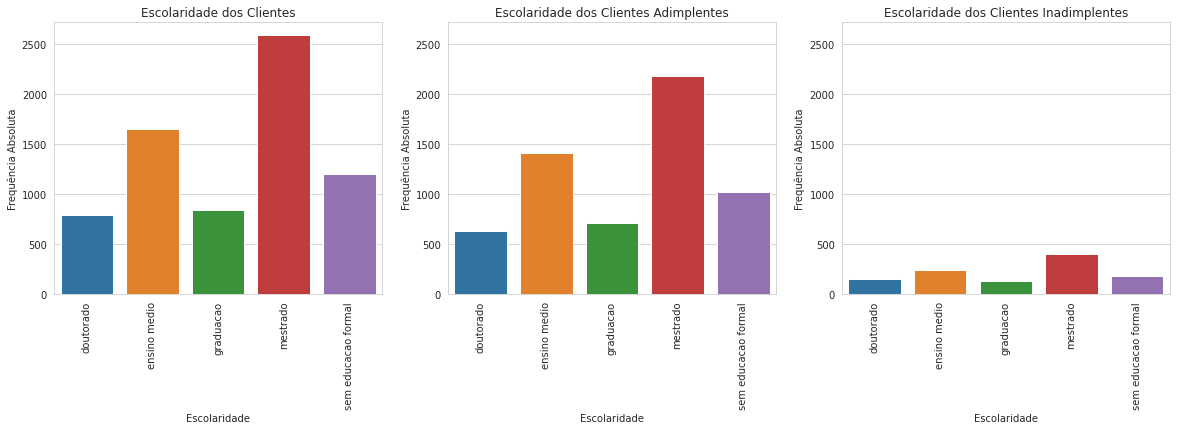

In [40]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
dfs = [df, df_adim, df_inadim]

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

### 4\.2 Analisando se o salario anual pode impactar na Inadimplência
> insight: o padrão se mantém logo não vai ser um campo determinante de inadimplência

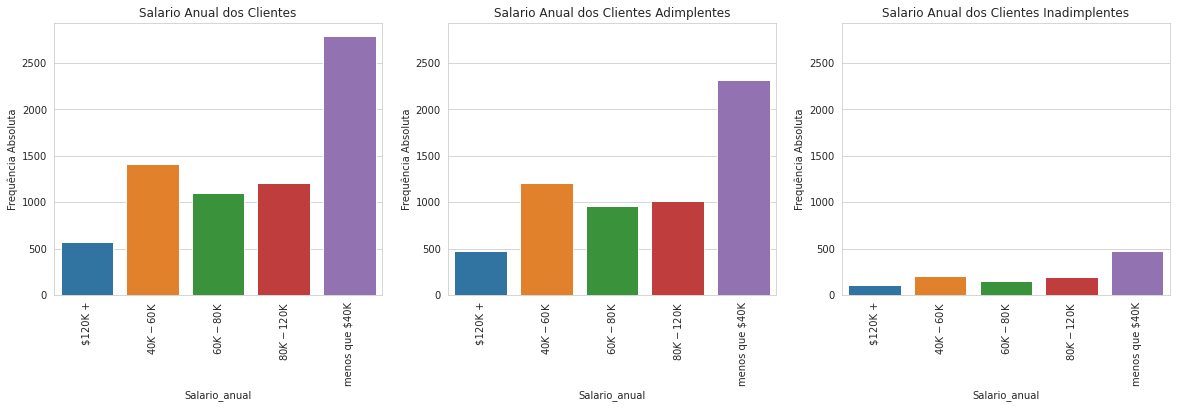

In [41]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario Anual dos Clientes Adimplentes', 'Salario Anual dos Clientes Inadimplentes']
dfs = [df, df_adim, df_inadim]

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

In [42]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


### 4\.3 Analisando se o estado civíl pode impactar na Inadimplência
> insight: o padrão se mantém logo não vai ser um campo determinante de inadimplência

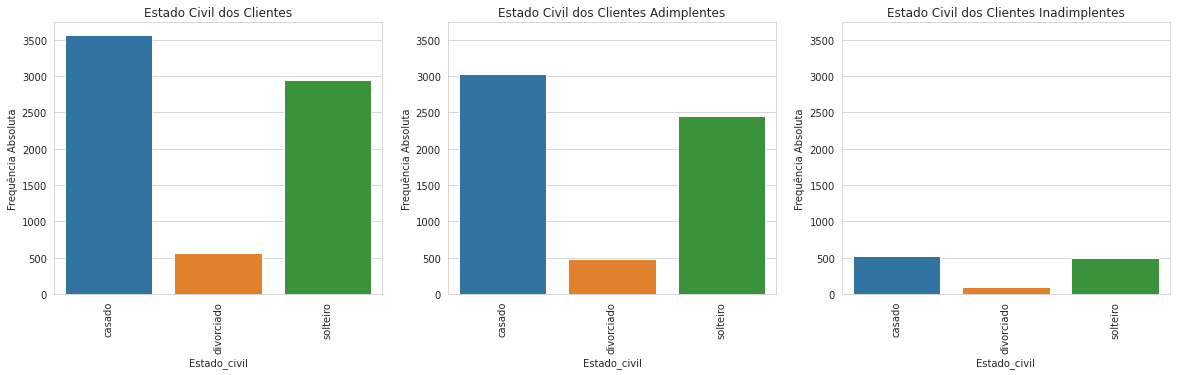

In [43]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

### 4\.3 Analisando se Tipo do Cartão pode impactar na Inadimplência
> insight: o padrão se mantém logo não vai ser um campo determinante de inadimplência

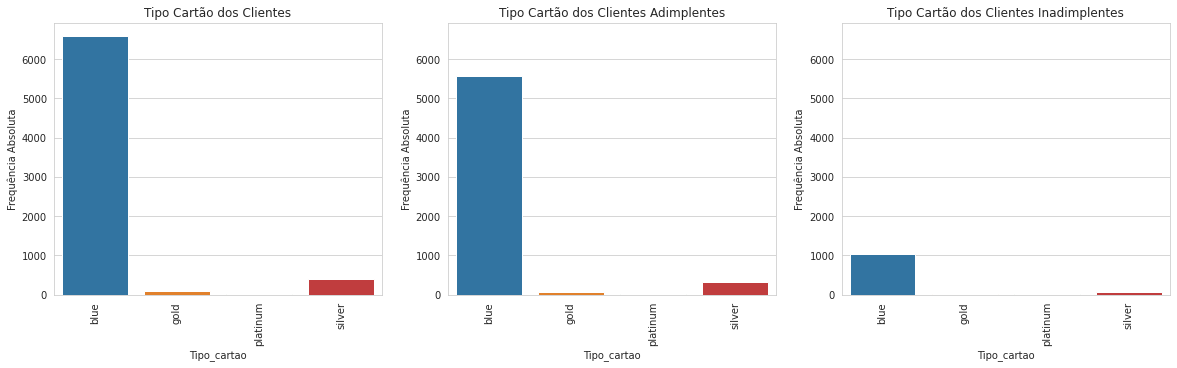

In [44]:
coluna = 'tipo_cartao'
titulos = ['Tipo Cartão dos Clientes', 'Tipo Cartão dos Clientes Adimplentes', 'Tipo Cartão dos Clientes Inadimplentes']

graph_analize(coluna=coluna, titulos=titulos, dfs=dfs)

### 4\.4 Analisando se Qtd. de Transações no Último Ano pode impactar na Inadimplência

In [45]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [46]:
def grap_analize_num(coluna: str, titulos: list, dfs: list):
  max_y = 0

  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for eixo, df in enumerate(dfs):
    f = sns.histplot(
        x=coluna,
        data=df,
        stat='count',
        ax=eixos[eixo]        
    )

    x_label = coluna.replace('_', ' ').replace('12m', '12 meses').title()

    f.set(
        title=titulos[eixo],
        xlabel=x_label,
        ylabel='Frequência Absoluta'
    )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

    f.set(ylim=(0, max_y))
  
  figura.show()

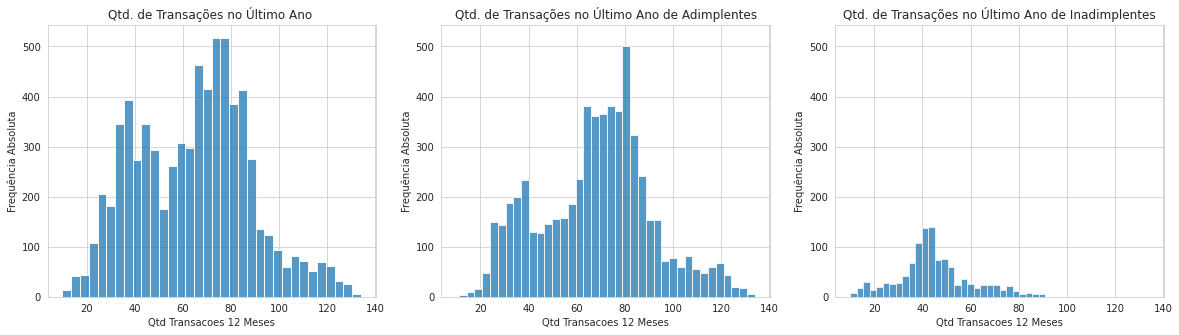

In [47]:
title = 'Qtd. de Transações no Último Ano {}'
list_titles = [title.format(text) for text in ['', 'de Adimplentes', 'de Inadimplentes']]

grap_analize_num(
    coluna='qtd_transacoes_12m',
    titulos=list_titles,
    dfs=dfs
)

> Existe uma diferença nos padrões enquanto clientes Adimplentes tem picos de quantidades de transações entre 60 e 100 clientes Inadimplentes tem picos próximos de 40, logo pode ser usado para identificar um cliente Inadimplente

### 4\.5 Analisando se Valor das Transações no Último Ano pode impactar na Inadimplência

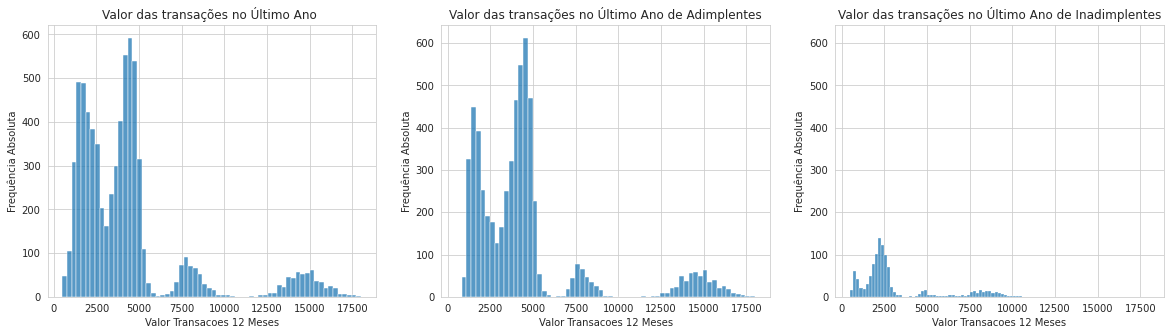

In [48]:
title = 'Valor das transações no Último Ano {}'
list_titles = [title.format(text) for text in ['', 'de Adimplentes', 'de Inadimplentes']]

grap_analize_num(
    coluna='valor_transacoes_12m',
    titulos=list_titles,
    dfs=dfs
)

> Existe uma diferença nos padrões enquanto clientes Adimplentes tem picos de valor das transações próximos menores que 2500 e próximos na faixa de 5000, 7500 e 15.000 clientes Inadimplentes tem picos próximos de 2500, logo pode ser usado para identificar clientes Inadimplentes

## 5\. Conclusão final


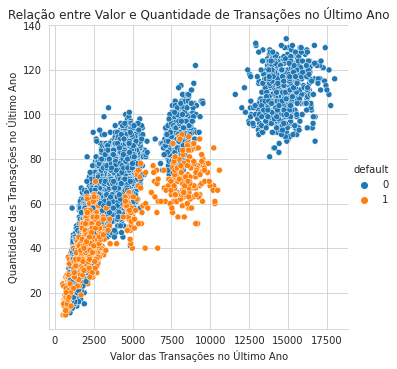

In [49]:
f = sns.relplot(
    x='valor_transacoes_12m',
    y='qtd_transacoes_12m',
    data=df,
    hue='default'
)

_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

> usando os valores de trasações em um ano e a quantidade de transações em um ano no gráfico de disperção concluímos que os clientes que realizam menos de 100 transações por ano e que o valor está abaixo dos 10.000 tem mais chances de serem inadimplentes, se dividindo mais claramente em dois blocos: 
*   Quantidade de transações iguais ou menores que 60 e valor das transações menor que 5.000
*   Quantidade de transações entre 90 e 50 e valor das transações entre 11.000 e 6.500 

